# Assignment 2

Use this notebook to write your code for assignment 2

# Pre-processing data

Read the data file of `shakespeare.txt` and prepare the inputs/outputs to your model.

In [1]:
import unidecode
import string
import random
import re
import torch
import torch.nn as nn
from torch.autograd import Variable
import time, math

In [2]:
all_characters = string.printable # list of all possible characters (from string)
num_characters = len(all_characters) # number of possible characters

text = unidecode.unidecode(open('./data/shakespeare.txt').read())

text_len = len(text) 

sequence_len = 40

def generate_sequence():
    start_index = random.randint(0, text_len - sequence_len)
    end_index = start_index + sequence_len + 1
    return text[start_index:end_index]


# Build the Model

Implement a character-based LSTM model 

In [3]:
class CharNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(CharNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers)
        
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.lstm(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self): 
        return (torch.zeros(1, 1, self.hidden_size),
                torch.zeros(1, 1, self.hidden_size))

In [4]:
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)


# Training

The main training routine

In [5]:
def generate_training_set():    
    
    sequence = generate_sequence()
    inp = char_tensor(sequence[:-1])
    target = char_tensor(sequence[1:])
    
    return inp, target

In [6]:

def evaluate_CharNN(character_seed='A', predict_len=100, temperature=0.8):
    
    hidden = decoder.init_hidden()
    seed_input = char_tensor(character_seed)
    predicted_string = character_seed

    for p in range(len(character_seed) - 1):
        _, hidden = decoder(seed_input[p], hidden)
    inp = seed_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        output_distribution = output.data.view(-1).div(temperature).exp()
        top_character = torch.multinomial(output_distribution, 1)[0]
        predicted_char = all_characters[top_character]
        predicted_string += predicted_char 
        inp = char_tensor(predicted_char) 
        
    return predicted_string

In [7]:

def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()

    loss = 0

    for c in range(sequence_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, torch.LongTensor([target[c]]))

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / sequence_len

In [8]:
def runtime(instant):
    seconds = time.time() - instant
    minutes= math.floor(seconds / 60)
    seconds -= minutes * 60
    return '%dm %ds' % (minutes, seconds)

In [9]:
num_epochs = 3000
print_every = 500 
plot_every = 10 
hidden_size = 200
num_layers = 1
learning_rate = 0.005

decoder = CharNN(num_characters, hidden_size, num_characters, num_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = [] 
loss_avg = 0

for epoch in range(1, num_epochs + 1):
    loss = train(*generate_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[Runtime: %s, Epoch: %d (%d%%), Loss: %.4f]' % (runtime(start), epoch, epoch / num_epochs * 100, loss))
        print(evaluate_CharNN('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every) 
        loss_avg = 0

[Runtime: 0m 18s, Epoch: 500 (16%), Loss: 1.9268]
Whell evee,
Theeks nom then gising there,
And beshent lfi lover feers then evesteed,
And bour do wheed 

[Runtime: 0m 37s, Epoch: 1000 (33%), Loss: 1.6013]
When that on to not this are mor the mugh bow,


                                              133
Whi 

[Runtime: 0m 55s, Epoch: 1500 (50%), Loss: 2.0303]
Whou bas spene forl.
                                                                                  

[Runtime: 1m 13s, Epoch: 2000 (66%), Loss: 1.7257]
Whin allif thy glalp thou freated love healave the bace of ull
Pith,
  I hoy wenter abused,
I day,
Lie 

[Runtime: 1m 36s, Epoch: 2500 (83%), Loss: 1.9328]
Where faantewer out lies for fom The form Ive for more from face is fair out on.
I fair that stime ind 

[Runtime: 1m 55s, Epoch: 3000 (100%), Loss: 1.8210]
Whis:
That as my swire all that dolour, or's grasted the the blessle outst his but hast oppressing it  



# Plotting the Training Losses

Plotting the historical loss during training:

Text(0, 0.5, 'Loss')

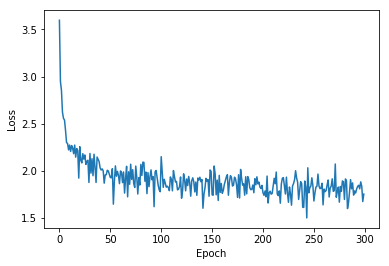

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# Plot Loss function using "all_losses"
plt.figure()
plt.plot(all_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')


# Evaluating at different "temperatures"

Changing the `temperature` argument (variance) for 1.5, 0.75. 0.25 and sample outputs from the trained model.

In [11]:
print(evaluate_CharNN('Shall I compare thee to a summer''s day?\n', 300, temperature=1.5))

Shall I compare thee to a summers day?
Thy o rmustertlil, an thu lives torlon she?
Of yoonithes-mscce.
HfoIly 31W; whingned, outlow?
If timume,
The me youe, whicht
Ming botneed whyin evels.
Fobruoute in bemont feaunjtl sped, and not  H-t to it yame,
Trnourightluit (epelloesuss now, andckly conothy shros pargakic 9ly umet,
Inl, oremorney,


In [12]:
print(evaluate_CharNN('Shall I compare thee to a summer''s day?\n', 300, temperature=0.75))

Shall I compare thee to a summers day?
And to in and this prow, kights which better sessed make it shfire nothered, wen prons gished a shall desire be me our thee but will gives that that shand thy some part will doth thoughts I that on the laissed thy not stall hath things in the on thee that soon.


                                 3
O


In [13]:
print(evaluate_CharNN('Shall I compare thee to a summer''s day?\n', 300, temperature=0.25))

Shall I compare thee to a summers day?
That the beauty the recay
That the beauty so that the be the love the in the despise that the be more the in thee that thee this that thee that that that this the be that that in thee that shall me that that that the when thee, and the be that the live that the beauty shall thee that the recons the 
